# Error and correlation in binding free energies

In [226]:
# Loads stuff
import sys
sys.path.insert(0,"/home/lg3u19/OnePy")
import onetep_v0_1 as op
import pathlib
import pandas as pd
pd.set_option('display.precision',3) 
import copy
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sea
import random

In [227]:
def color_mag_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for values 
    above a threshold, black otherwise.
    """
    color = 'red' if val > 0.05 else 'white'
    return 'color: %s' % color

In [228]:
ref = 'Exp'
csv_source_entropy = './ProcessedData/Entropy'
csv_source_empdisp = './ProcessedData/EmpiricalDispersion'

In [229]:
snapshots_5 = ['24801', '32401', '17201', '9601','2001'] 
snapshots_10 = ['24801', '32401', '17201', '13401', '21001', '28601', '9601', '5801','36201','2001'] 
snapshots_25 = [2001, 3521, 5041, 6561, 8081, 9601, 11121, 12641, 14161, 15681, 17201, 18721, 20241, 21761, 23281, 24801, 26321, 27841, 29361, 30881, 32401, 33921, 35441, 36961, 38481]
snapshots_25 = [str(x) for x in snapshots_25]
snapshots_50 = [2001, 2761, 3521, 4281, 5041, 5801, 6561, 7321, 8081, 8841, 9601, 10361, 11121, 11881, 12641, 13401, 14161, 14921, 15681, 16441, 17201, 17961, 18721, 19481, 20241, 21001, 21761, 22521, 23281, 24041, 24801, 25561, 26321, 27081, 27841, 28601, 29361, 30121, 30881, 31641, 32401, 33161, 33921, 34681, 35441, 36201, 36961, 37721, 38481, 39241]
snapshots_50 = [str(x) for x in snapshots_50]

## Functions for analysis

In [230]:
def apply_one_metric(df,columns,ref,metric,out_index=-1):
    temp_dict = {}
    for column in columns:
        out = metric(df[column],df[ref])
        if out_index!=-1 and isinstance(out,tuple)==True:
                temp_dict[column]=out[out_index]
        else:
            temp_dict[column]=out
    return pd.Series(temp_dict)

In [231]:
def apply_multiple_metrics(df,columns,ref,metrics):
    list_of_series = []
    name_dict={}
    count = 0
    for metric in metrics:
        name_dict[count]=metric.__name__
        list_of_series.append(apply_one_metric(df,columns,ref,metric,out_index=0))
        count += 1
    df = pd.DataFrame(list_of_series)
    df =  df.rename(index=name_dict)
    return df

In [232]:
def root_mean_square_error(a,b):
    return math.sqrt(mean_squared_error(a,b))

## Load data from csv

In [233]:
# load empdisp 10 corrected
corrected_10 = pd.read_csv(csv_source_empdisp+'/EmpDisp_corrected_10.csv',index_col=0)
# empdisp 10 corrected, 50 snap entropy
corrected_10_entropy50 = pd.read_csv(csv_source_entropy+'/Entropy50_corrected_10.csv',index_col=0)
# empdisp 25 corrected
corrected_25 = pd.read_csv(csv_source_empdisp+'/EmpDisp_corrected_25.csv',index_col=0)
# empdisp 25 corrected, 50 snap entropy
corrected_25_entropy50 = pd.read_csv(csv_source_entropy+'/Entropy50_corrected_25.csv',index_col=0)
# empdisp 25 corrected, 25 snap entropy
corrected_25_entropy25 = pd.read_csv(csv_source_entropy+'/Entropy25_corrected_25.csv',index_col=0)


In [234]:
# grab list of columns excluding Exp, which is column of experimental values
columns_without_exp = list(corrected_10.columns)
columns_without_exp.remove('Exp')

# Analyze correlation and error 

In [235]:
def get_metric_df(data_df, metrics, columns_without_exp,sort='pearsonr',ref='Exp'):
    df_metrics = apply_multiple_metrics(data_df,columns_without_exp,ref,metrics)
    df_metrics = df_metrics.transpose()
    return df_metrics.sort_values(sort,axis=0,ascending=False)

In [236]:
metrics = [stats.pearsonr,stats.spearmanr,stats.kendalltau,root_mean_square_error]

In [237]:
metrics_corrected_10 = get_metric_df(corrected_10,metrics,columns_without_exp)
metrics_corrected_10

,pearsonr,spearmanr,kendalltau,root_mean_square_error
PBE_old,0.587,0.632,0.548,2.557
PBE_bjm,0.575,0.632,0.548,2.583
PBE_bj,0.574,0.632,0.548,2.587
PBE_zero,0.569,0.632,0.548,2.605
PBE,0.310,0.316,0.183,3.880
MM,0.270,0.316,0.183,4.134
B97M-V,0.123,-0.632,-0.548,4.038
VV10,0.104,-0.316,-0.183,4.275
5_snaps_thesis,0.065,-0.316,-0.183,6.348


In [238]:
metrics_corrected_10_entropy50 = get_metric_df(corrected_10_entropy50,metrics,columns_without_exp)
metrics_corrected_10_entropy50

,pearsonr,spearmanr,kendalltau,root_mean_square_error
PBE_old,0.514,0.632,0.548,2.589
PBE_bjm,0.502,0.632,0.548,2.591
PBE_bj,0.501,0.632,0.548,2.592
PBE_zero,0.497,0.632,0.548,2.611
MM,0.285,0.316,0.183,3.278
PBE,0.249,-0.316,-0.183,3.324
B97M-V,0.089,-0.316,-0.183,3.532
VV10,0.079,-0.316,-0.183,3.744
5_snaps_thesis,0.049,-0.316,-0.183,5.563


In [239]:
metrics_corrected_25 = get_metric_df(corrected_25,metrics,columns_without_exp)
metrics_corrected_25

,pearsonr,spearmanr,kendalltau,root_mean_square_error
PBE_old,0.837,0.316,0.183,2.538
PBE_bjm,0.816,0.316,0.183,2.612
PBE_bj,0.814,0.316,0.183,2.619
PBE_zero,0.809,0.316,0.183,2.633
PBE,0.219,-0.316,-0.183,4.326
5_snaps_thesis,0.065,-0.316,-0.183,6.348
B97M-V,-0.130,-0.316,-0.183,4.416
VV10,-0.140,-0.316,-0.183,4.642
MM,-0.153,0.316,0.183,4.646


In [240]:
metrics_corrected_25_entropy50 = get_metric_df(corrected_25_entropy50,metrics,columns_without_exp)
metrics_corrected_25_entropy50

,pearsonr,spearmanr,kendalltau,root_mean_square_error
PBE_old,0.756,0.316,0.183,1.840
PBE_bjm,0.734,0.316,0.183,1.913
PBE_bj,0.732,0.316,0.183,1.920
PBE_zero,0.725,0.316,0.183,1.937
PBE,0.186,-0.316,-0.183,3.533
5_snaps_thesis,0.049,-0.316,-0.183,5.563
B97M-V,-0.127,-0.316,-0.183,3.704
VV10,-0.141,-0.316,-0.183,3.915
MM,-0.201,0.316,0.183,3.795


In [241]:
metrics_corrected_25_entropy25 = get_metric_df(corrected_25_entropy25,metrics,columns_without_exp)
metrics_corrected_25_entropy25

,pearsonr,spearmanr,kendalltau,root_mean_square_error
PBE_old,0.683,0.316,0.183,2.396
PBE_bjm,0.653,0.316,0.183,2.471
PBE_bj,0.650,0.316,0.183,2.478
PBE_zero,0.641,0.316,0.183,2.494
PBE,-0.030,-0.316,-0.183,4.136
5_snaps_thesis,-0.074,-0.316,-0.183,6.155
VV10,-0.339,-0.632,-0.548,4.509
B97M-V,-0.347,-0.632,-0.548,4.306
MM,-0.369,-0.316,-0.183,4.440


Summary of findings:  
For both 10 and 25 snapshots with and without different entropy corrections PBE+D2(old) always performs best in linear correlation (pearson R) and has the lowest RMSE. All 4 PBE+D2/D3 methods have the same ranking correlation (spearmanr and kedalltau) for all combinations of snapshots and entropies. The ranking correlation of all other methods ar mostly negative, indicating an icorrect (inverse) ordering of the ligand binding affinities (exception PBE+Elstner n MM at 10 snaps). The RMSE of PBE+D2/D3 is about half that of the other methods, with MM and VV10 performing worst overall. Both VV10 and B97M-rV consistently show negative linear and ranking correlations and high errors.  

## What if ignore non-binder

In [256]:
corrected_25_entropy50.loc[['catechol','fluoroaniline','methylphenol'],:]

,PBE,VV10,B97M-V,5_snaps_thesis,MM,PBE_bj,PBE_bjm,PBE_old,PBE_zero,Exp
catechol,-8.016,-8.286,-8.085,-11.804,-4.057,-6.985,-6.980,-6.945,-7.012,-4.4
fluoroaniline,-4.571,-4.120,-4.328,-5.145,-7.699,-4.593,-4.596,-4.641,-4.579,-5.5
methylphenol,-7.112,-6.813,-6.255,-8.547,-5.884,-5.251,-5.248,-5.177,-5.251,-4.4


In [257]:
metrics_corrected_25_entropy50 = get_metric_df(corrected_25_entropy50.loc[['catechol','fluoroaniline','methylphenol'],:],
                                               metrics,columns_without_exp)
metrics_corrected_25_entropy50

,pearsonr,spearmanr,kendalltau,root_mean_square_error
MM,0.865,0.866,0.816,1.545
PBE_old,-0.680,-0.866,-0.816,1.614
PBE_bjm,-0.711,-0.866,-0.816,1.653
PBE_bj,-0.713,-0.866,-0.816,1.656
PBE_zero,-0.713,-0.866,-0.816,1.673
5_snaps_thesis,-0.872,-0.866,-0.816,4.904
B97M-V,-0.873,-0.866,-0.816,2.476
VV10,-0.937,-0.866,-0.816,2.759
PBE,-0.967,-0.866,-0.816,2.664


In [258]:
metrics_corrected_25= get_metric_df(corrected_25.loc[['catechol','fluoroaniline','methylphenol'],:],
                                               metrics,columns_without_exp)
metrics_corrected_25

,pearsonr,spearmanr,kendalltau,root_mean_square_error
MM,0.748,0.866,0.816,2.612
PBE_old,-0.919,-0.866,-0.816,2.173
PBE_zero,-0.934,-0.866,-0.816,2.227
5_snaps_thesis,-0.936,-0.866,-0.816,5.597
PBE_bjm,-0.937,-0.866,-0.816,2.213
PBE_bj,-0.937,-0.866,-0.816,2.216
B97M-V,-0.977,-0.866,-0.816,3.070
VV10,-0.996,-0.866,-0.816,3.372
PBE,-0.997,-0.866,-0.816,3.383


Ignoring the non-binder, MM performs best, be far, due its suprisingly good result for catechol. All other methods show negative correlations indicating that the ordering of the three remaining ligands is not accuratly predicted. However, RMSE decrease when the non-binder is excluded. 

## What if ignore Catechol 

In [259]:
corrected_25_entropy50.loc[['hydroxyaniline','fluoroaniline','methylphenol'],:]

,PBE,VV10,B97M-V,5_snaps_thesis,MM,PBE_bj,PBE_bjm,PBE_old,PBE_zero,Exp
hydroxyaniline,-5.352,-6.203,-6.040,-7.187,-7.103,-2.551,-2.538,-2.393,-2.572,0.0
fluoroaniline,-4.571,-4.120,-4.328,-5.145,-7.699,-4.593,-4.596,-4.641,-4.579,-5.5
methylphenol,-7.112,-6.813,-6.255,-8.547,-5.884,-5.251,-5.248,-5.177,-5.251,-4.4


In [260]:
metrics_corrected_25_entropy50 = get_metric_df(corrected_25_entropy50.loc[['hydroxyaniline','fluoroaniline','methylphenol'],:],
                                               metrics,columns_without_exp)
metrics_corrected_25_entropy50

,pearsonr,spearmanr,kendalltau,root_mean_square_error
PBE_old,0.931,0.5,0.333,1.535
PBE_bjm,0.912,0.5,0.333,1.631
PBE_bj,0.911,0.5,0.333,1.639
PBE_zero,0.907,0.5,0.333,1.652
PBE,0.029,-0.5,-0.333,3.505
MM,-0.005,0.5,0.333,4.378
5_snaps_thesis,-0.300,-0.5,-0.333,4.795
VV10,-0.476,-0.5,-0.333,3.924
B97M-V,-0.574,-0.5,-0.333,3.710


In [247]:
metrics_corrected_25= get_metric_df(corrected_25.loc[['hydroxyaniline','fluoroaniline','methylphenol'],:],
                                               metrics,columns_without_exp)
metrics_corrected_25

,pearsonr,spearmanr,kendalltau,root_mean_square_error
PBE_old,0.893,0.5,0.333,2.389
PBE_bjm,0.872,0.5,0.333,2.479
PBE_bj,0.870,0.5,0.333,2.487
PBE_zero,0.867,0.5,0.333,2.496
MM,0.212,0.5,0.333,5.365
PBE,0.125,-0.5,-0.333,4.425
5_snaps_thesis,-0.189,-0.5,-0.333,5.784
VV10,-0.331,-0.5,-0.333,4.756
B97M-V,-0.380,-0.5,-0.333,4.523


Despite the poor performance of the QM methods on Catechol, removing it from the sample has little effect on overall performance. the linear correation and ranking correlation of PBE+D2/D3 based methods is improved and RMSE errors slightly decreased. 

## Idea: analyze how different the distributions of binding energies of snapshots are between the different methods for the same ligand. 
Once have 25 and 50 snaps can ivestigate if the bidning energies of the snapshots are drawn from the same distributions. i.e if the distrib of binding energies between different methods is distinguishable by a number of statistical metrics. Also look as histogram distribution of gas phase, g_solv and binding energies. Can also compare E and G_solv and G_bind to MM values. 

In [261]:
csv_source_binding_snaps = './ProcessedData/BindingComponents'
csv_source_binding_snaps_MM = './ProcessedData/BindingComponentsMM'

In [262]:
ligands = ['phenol','catechol','fluoroaniline','hydroxyaniline','methylphenol']
snaps_num = 25
snaps_dict = {}
for ligand in ligands:
    snaps_dict_inner = {}
    for functional in ['PBE','B97M-V','VV10']:
        filename = '/'+ligand+'_'+functional+'_'+str(snaps_num)+'_corrected.csv'
        snaps_dict_inner[functional] = pd.read_csv(csv_source_binding_snaps+filename,index_col=0)
    # load MM results
   # mm_df = pd.read_csv('./MM-PBSA/'+ligand+'/mm-'+ligand+'.csv')
   # mm_df = mm_df.set_index(mm_df.columns[0])
   # mm_df = mm_df.loc[[int(x) for x in snapshots_25],:]
   # mm_df.columns = ['E','polar','non-polar','G_bind']
    mm_df = pd.read_csv(csv_source_binding_snaps_MM+'/'+ligand+'_MM_'+str(snaps_num)+'_corrected.csv',index_col=0)
    snaps_dict_inner['MM']=mm_df
    snaps_dict[ligand]=snaps_dict_inner

In [263]:
def correlation_df(snap_dict,metrics,column='G_bind'):
    correlation_df_list = []
    name_list = []
    for ligand in snap_dict.keys():
        series_list = []
        a = list(snap_dict[ligand].keys())[0]
        b = list(snap_dict[ligand].keys())[1]
        metric_dict = {}
        for metric in metrics:
            metric_dict[metric.__name__]=metric(snaps_dict[ligand][a][column],snaps_dict[ligand][b][column])[1]
        series_list.append(pd.Series(metric_dict))
        series_list[0].name = '('+a+','+b+')'
        a = list(snap_dict[ligand].keys())[0]
        b = list(snap_dict[ligand].keys())[2]
        metric_dict = {}
        for metric in metrics:
            metric_dict[metric.__name__]=metric(snaps_dict[ligand][a][column],snaps_dict[ligand][b][column])[1]
        series_list.append(pd.Series(metric_dict))
        series_list[1].name = '('+a+','+b+')'
        a = list(snap_dict[ligand].keys())[1]
        b = list(snap_dict[ligand].keys())[2]
        metric_dict = {}
        for metric in metrics:
            metric_dict[metric.__name__]=metric(snaps_dict[ligand][a][column],snaps_dict[ligand][b][column])[1]
        series_list.append(pd.Series(metric_dict))
        series_list[2].name = '('+a+','+b+')'
        
        a = list(snap_dict[ligand].keys())[0]
        b = list(snap_dict[ligand].keys())[3]
        metric_dict = {}
        for metric in metrics:
            metric_dict[metric.__name__]=metric(snaps_dict[ligand][a][column],snaps_dict[ligand][b][column])[1]
        series_list.append(pd.Series(metric_dict))
        series_list[3].name = '('+a+','+b+')'
        a = list(snap_dict[ligand].keys())[1]
        b = list(snap_dict[ligand].keys())[3]
        metric_dict = {}
        for metric in metrics:
            metric_dict[metric.__name__]=metric(snaps_dict[ligand][a][column],snaps_dict[ligand][b][column])[1]
        series_list.append(pd.Series(metric_dict))
        series_list[4].name = '('+a+','+b+')'
        a = list(snap_dict[ligand].keys())[2]
        b = list(snap_dict[ligand].keys())[3]
        metric_dict = {}
        for metric in metrics:
            metric_dict[metric.__name__]=metric(snaps_dict[ligand][a][column],snaps_dict[ligand][b][column])[1]
        series_list.append(pd.Series(metric_dict))
        series_list[5].name = '('+a+','+b+')'
        
        correlation_df_list.append(pd.DataFrame(series_list))
        name_list.append(ligand)
    return pd.concat(correlation_df_list,axis=1,keys=name_list).transpose()
            
    

In [264]:
# binding energy
summary =correlation_df(snaps_dict,[stats.ttest_rel,stats.wilcoxon,stats.ks_2samp],column='G_bind')
summary.style.applymap(color_mag_red)

Overall, the distributions of binding free energies of PBE-Elstner and B97M-rV most similar, specifically for catechol and hydroxyaniline. For all other paris, only the Komogorov-Smirnov test yields significant results. This test looks at more than just the similarity of mean and need to think about what it tells me. Probably indicates that shapes of the distributions are very similar, which is to be expected, maybe even a positive thing. MM results differ significantly from the QM results with the exception of VV10 and MM for catechol, but even here the p values are only slighlty above 0.05 (except KS=0.23). On the whole, distributions of binding energies obtained by different methods are very likely to have different population means, and hence the choice of functional is significant when calculating binding free energies. 

In [252]:
# Gas phase energy
summary =correlation_df(snaps_dict,[stats.ttest_rel,stats.wilcoxon,stats.ks_2samp],column='E')
summary.style.applymap(color_mag_red)

The distributions of the gas phase energies show much less similarities than the binding energies. Even for PBE-B97M-V for catechol and hydroxyanline only on significant p value is obtained (KS). B97M-rV and VV10 show similarities on the KS-test, i.e similarities in shape of distributions. The only MM-QM combinations with p>0.05 are for PBE-MM (KS mostly). I.e Gas phase energies, as expected, massively impacted by choice of functional and it is clear that different functionals produce different distributions of gas phase energies with different means and maybe even shapes. 

In [110]:
# uncorrected solvation energry
summary =correlation_df(snaps_dict,[stats.ttest_rel,stats.wilcoxon,stats.ks_2samp],column='G_solv')
summary.style.applymap(color_mag_red)

The unocrrected solvation energies show suprising similarities between the QM methods. No similrities are found between the MM and QM methods, which supports findings of 2014 paper. PBE-B97M-V have significant p-values across ligands and tests. PBE-VV10 and B98M-rV hav less but still a majority significant p-values. Supports idea that in onetep g_solv only loosly correlated to choice of functional. Especially for catechol and fluoroaniline, less so for hydroxyaniline and methylphenol.

In [111]:
# corrected solvation energy
summary =correlation_df(snaps_dict,[stats.ttest_rel,stats.wilcoxon,stats.ks_2samp],column='G_solv_corrected')
summary.style.applymap(color_mag_red)

Interestingly the application of the correction term to the solvation energy leads to much less significant p values. While still more than gas phase, less than binding energies. Excpet B97M-rV and VV10 which remain similar for catechola nd fluoroaniline.

(array([2., 1., 0., 4., 6., 1., 6., 4., 0., 1.]),
 array([-9.69252369, -8.52003488, -7.34754607, -6.17505725, -5.00256844,
        -3.83007963, -2.65759082, -1.48510201, -0.31261319,  0.85987562,
         2.03236443]),
 <a list of 10 Patch objects>)

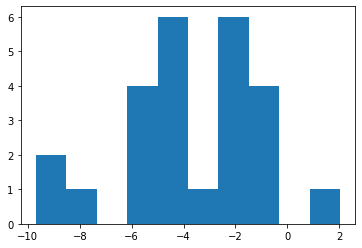

In [77]:
plt.hist(phenol_B97MV_25_corrected['G_ind'])

## Convergence and SEM 

In [161]:
# build a function, that takes mean, std, sem or other and return df with that statistic over some subset
def subset_statistic(data,index,statistic,column):
    """ given df, index subset as list and column name, computes statistic"""
    subset_df = data.reindex(index)
    return getattr(subset_df[column],statistic)()

In [162]:
def series_subset_statistic(data,index,statistics,column):
    """ given data frame creates df of statistics of one column
        statistics is list of statistics """
    temp_dict = {}
    for statistic in statistics:
        temp_dict[statistic] = subset_statistic(data,index,statistic,column)
    return pd.Series(temp_dict)
        

In [163]:
def series_subset_statistic_indexes(data,indexes,statistic,column):
    """ given data frame creates df of statistics of one column
        indexes is nested list of indexes """
    temp_dict = {}
    for index in indexes:
        temp_dict[len(index)] = subset_statistic(data,index,statistic,column)
    return pd.Series(temp_dict)
        

In [164]:
def df_subset_statistic(data_dict,index,statistics,column):
    """ given dict of df, applies list of statistics to column in each and returns summary df"""
    temp_dict = {}
    # if list of lists of indexes give:  
    if type(statistics) is list:
        if any(isinstance(i, list) for i in index) == True:
            print ('either list of stats or indexes')
            return False
        else:
            for key in data_dict.keys():
                temp_dict[key] = series_subset_statistic(data_dict[key],index,statistics,column)
            return pd.DataFrame(temp_dict)
    elif all(isinstance(i, list) for i in index) == True:
        if type (statistics) is not list:
            for key in data_dict.keys():
                temp_dict[key] = series_subset_statistic_indexes(data_dict[key],index,statistics,column)
            return pd.DataFrame(temp_dict)
                
    

In [168]:
def df_subset_statistic(data_dict,index,statistics,column):
    """ given dict of df, applies list of statistics to column in each and returns summary df"""
    temp_dict = {}
    # determine if list of statistics given and if nested list of indexes given
    # is list of statistics given:
    if type(statistics) is list:
        # if indexes is a nested list :
        if all(isinstance(i, list) for i in index) == True:
            for key in data_dict.keys():
                temp_dict_inner = {}
                for subset in index:
                    temp_dict_inner[len(subset)]=series_subset_statistic(data_dict[key],subset,statistics,column)
                temp_dict[key]=temp_dict_inner
            return op.df_from_dict_2nested(temp_dict)
        else:
            for key in data_dict.keys():
                temp_dict[key] = series_subset_statistic(data_dict[key],index,statistics,column)
            return pd.DataFrame(temp_dict)
    elif all(isinstance(i, list) for i in index) == True:
        if type (statistics) is not list:
            for key in data_dict.keys():
                temp_dict[key] = series_subset_statistic_indexes(data_dict[key],index,statistics,column)
            return pd.DataFrame(temp_dict)
                
    

In [185]:
#summary_entropy = df_subset_statistic(entropy_dict,snapshots_50,['mean','std','sem','var'],column='S')
df_subset_statistic(snaps_dict['catechol'],[int(x) for x in snapshots_25],
                    ['mean','std','sem','var'],column='G_bind')

,PBE,B97M-V,VV10,MM
mean,-6.925,-6.523,-8.602,-9.698
std,3.011,2.550,2.438,1.810
sem,0.602,0.510,0.488,0.362
var,9.067,6.502,5.943,3.278


In [217]:
def random_sampling_stats(N,population,sample_sizes,processing_function,arg_dict,index_arg='index'):
    """ given a population of indexes, selects random samples of sizes sample_sizes and
    applies the processing_function, with a list of smaples (sample_list), and arg_dict"""
    count = 0
    df_list = []
    while count < N:
        count +=1
        sample_list = []
        # generate list of samples of appropriate sizes
        for size in sample_sizes:
            # changed random.sample to .choices for use with substitution, more akin to tarditional bootstrapping
            sample_list.append(random.choices(population,k=size))
        # adds the list of sumples as item in arg_dict with correct index_name, defaul name 'index'
        # carefull if processing function takes only on index list, might need to modify to unpack
        # one element list in that case
        arg_dict[index_arg]=sample_list
        # generate df for this iteration and append to list 
        df_list.append(processing_function(**arg_dict))
    return df_list

In [211]:
def average_over_multiple_df(list_of_df):
    local_list = copy.deepcopy(list_of_df)
    for i in range(1,len(local_list)):
        local_list[0]+=local_list[i]
    return local_list[0]/len(local_list)

In [212]:
arg_dict = {'data_dict':snaps_dict['catechol'], 'statistics':['mean','std','sem','var'], 'column':'G_bind'}
df_list = random_sampling_stats(10,snapshots_25,list(range(3,26)),df_subset_statistic,arg_dict)
average = average_over_multiple_df(df_list)

In [215]:
arg_dict = {'data_dict':snaps_dict['catechol'], 'statistics':'sem', 'column':'G_bind'}
df_list = random_sampling_stats(100,snapshots_25,list(range(3,26)),df_subset_statistic,arg_dict)
average_sem = average_over_multiple_df(df_list)

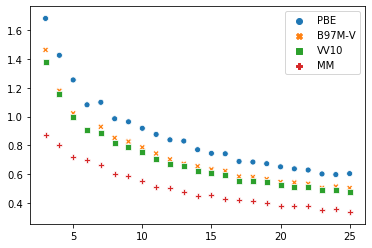

In [216]:
sea.scatterplot(data=average_sem)

In [220]:
arg_dict = {'data_dict':snaps_dict['catechol'], 'statistics':'mean', 'column':'G_bind'}
df_list = random_sampling_stats(1,snapshots_25,list(range(3,26)),df_subset_statistic,arg_dict)
average_mean = average_over_multiple_df(df_list)

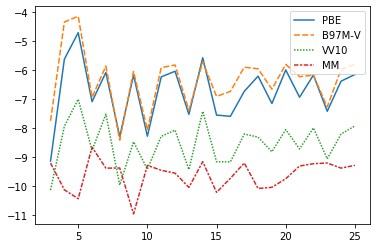

In [222]:
sea.lineplot(data=average_mean)